In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
test = pd.read_csv('titanic/test.csv')
train= pd.read_csv('titanic/train.csv')


In [3]:
train.info()
print('-'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

# Which features are categorical?

Categorical:

    -Categorical : Sex, Survived, Embarked
    -Ordinal: Pclass

# Which features are numerical?

Numarical 

    -Continous: Age, Fare. 
    -Discrete: SibSp, Parch.

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.isnull().sum().sum()

866

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",male,1601,G6,S
freq,1,577,7,4,644


0    61.616162
1    38.383838
Name: Survived, dtype: float64

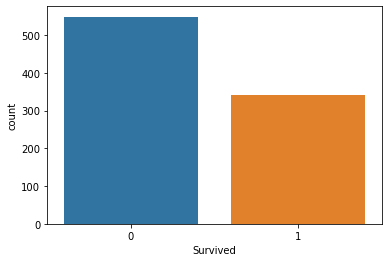

In [8]:
sns.countplot(x='Survived',data=train)
train['Survived'].value_counts(normalize=True)*100

Death:%61.61

Live :%38.38

male      64.758698
female    35.241302
Name: Sex, dtype: float64

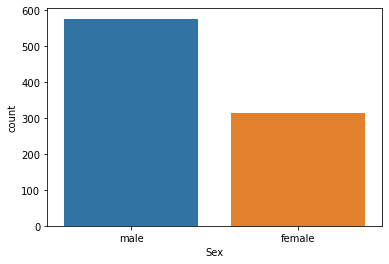

In [9]:
sns.countplot(x='Sex',data=train)
train['Sex'].value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

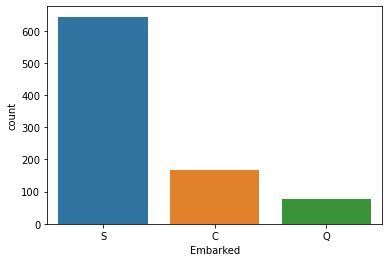

In [10]:
sns.countplot(x='Embarked',data=train)
train['Embarked'].value_counts(normalize=True)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

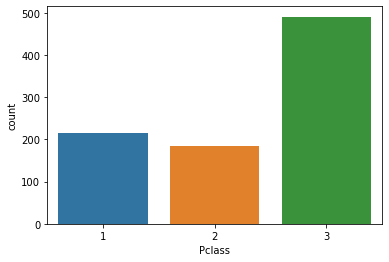

In [11]:
sns.countplot(x='Pclass',data=train)
train['Pclass'].value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

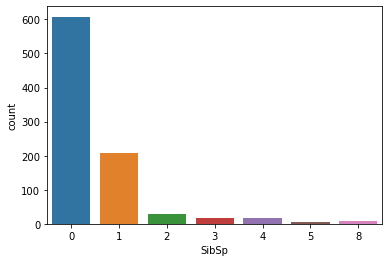

In [12]:
sns.countplot(x='SibSp',data=train)
train['SibSp'].value_counts(normalize=True)*100

In [13]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


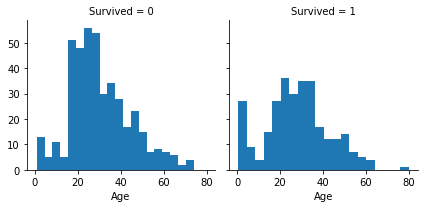

In [18]:
age_dist= sns.FacetGrid(train, col='Survived')
age_dist.map(plt.hist, 'Age', bins=20)

# Wrangling Data

In [19]:
complete =[train,test]

# Age Future

In [20]:
train.Age.isnull().sum()

177

In [21]:
train.Age.fillna(train.Age.median(),inplace=True)
test.Age.fillna(test.Age.median(),inplace=True)

In [22]:
train.Age.isnull().sum()
test.Age.isnull().sum()

0

In [23]:
train['AgeInterval'] = pd.cut(train['Age'],5)
test['AgeInterval'] = pd.cut(train['Age'],5)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInterval
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


In [24]:
for dataset in complete:
    dataset['Age'].fillna(train['Age'].median(),inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)

In [25]:
for dataset in complete:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] =4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInterval
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


In [26]:
train.Age.value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age, dtype: int64

In [27]:
train.drop('AgeInterval',axis =1,inplace=True)
test.drop('AgeInterval',axis =1,inplace=True)

In [28]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,2,1,0,A/5. 3337,14.5000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,2,0,0,237565,15.0000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,2,1,0,113789,52.0000,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,0,4,2,347077,31.3875,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,0,1,2,113760,120.0000,B96 B98,S


# Embarked Future

In [29]:
train.Embarked.isnull().sum()

2

In [30]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
train.Embarked.fillna('S',inplace=True)
test.Embarked.fillna('S',inplace=True)

In [32]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train.Embarked.isnull().sum()

0

In [34]:
Embarked_mapping = {"S": 1, "C": 2, "Q": 3}
for dataset in complete:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

# Ticket and Cabin Futures

In [35]:
train.drop(['Ticket','Cabin'], axis=1,inplace=True)
test.drop(['Ticket','Cabin'], axis=1,inplace=True)

# Name Future

In [36]:
for dataset in complete:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [37]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


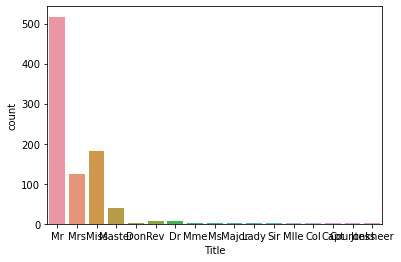

In [38]:
title= train['Title'].copy()
sns.countplot(x =title)


In [39]:
for dataset in complete:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [40]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [41]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [42]:
train.Title.isnull().sum()

0

In [43]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in complete:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,2,1,0,83.4750,1,1
163,164,0,3,"Calic, Mr. Jovo",male,1,0,0,8.6625,1,1
438,439,0,1,"Fortune, Mr. Mark",male,3,1,4,263.0000,1,1
661,662,0,3,"Badt, Mr. Mohamed",male,2,0,0,7.2250,2,1
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,1,0,0,7.2500,1,1
183,184,1,2,"Becker, Master. Richard F",male,0,2,1,39.0000,1,4


In [44]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [45]:
train.sample(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
57,58,0,3,male,1,0,0,7.2292,2,1
363,364,0,3,male,2,0,0,7.0500,1,1
520,521,1,1,female,1,0,0,93.5000,1,2
224,225,1,1,male,2,1,0,90.0000,1,1
499,500,0,3,male,1,0,0,7.7958,1,1
158,159,0,3,male,1,0,0,8.6625,1,1


# Sex Future

In [46]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])


In [47]:
train.sample(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
843,844,0,3,1,2,0,0,6.4375,2,1
245,246,0,1,1,2,2,0,90.0000,3,5
208,209,1,3,0,0,0,0,7.7500,3,2
286,287,1,3,1,1,0,0,9.5000,1,1
700,701,1,1,0,1,1,0,227.5250,2,3
85,86,1,3,0,2,3,0,15.8500,1,3
649,650,1,3,0,1,0,0,7.5500,1,2


# PassengerId Future

In [48]:

train.drop(['PassengerId'], axis=1,inplace=True)


In [49]:
train.sample(7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
495,0,3,1,1,0,0,14.4583,2,1
248,1,1,1,2,1,1,52.5542,1,1
801,1,2,0,1,1,1,26.2500,1,3
82,1,3,0,1,0,0,7.7875,3,2
241,1,3,0,1,1,0,15.5000,3,2
108,0,3,1,2,0,0,7.8958,1,1
671,0,1,1,1,1,0,52.0000,1,1


# Fare Future

In [50]:
train.Fare.isnull().sum()

0

In [51]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
test['FareBand'] = pd.qcut(train['Fare'], 4)

In [52]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
112,0,3,1,1,0,0,8.0500,1,1,"(7.91, 14.454]"
808,0,2,1,2,0,0,13.0000,1,1,"(7.91, 14.454]"
81,1,3,1,1,0,0,9.5000,1,1,"(7.91, 14.454]"
253,0,3,1,1,1,0,16.1000,1,1,"(14.454, 31.0]"
130,0,3,1,2,0,0,7.8958,2,1,"(-0.001, 7.91]"


In [53]:
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [54]:
for dataset in complete:
    dataset['Fare'].fillna(train['Fare'].median(),inplace=True)
    dataset['Fare'] = dataset['Fare'].astype(int)


In [55]:
for dataset in complete:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [56]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
771,0,3,1,2,0,0,0,1,1,"(-0.001, 7.91]"
236,0,2,1,2,1,0,2,1,1,"(14.454, 31.0]"
176,0,3,1,1,3,1,2,1,4,"(14.454, 31.0]"
209,1,1,1,2,0,0,2,2,1,"(14.454, 31.0]"
387,1,2,0,2,0,0,1,1,2,"(7.91, 14.454]"


In [57]:
train.drop('FareBand',axis=1,inplace=True)
test.drop('FareBand',axis=1,inplace=True)

In [58]:
train.sample(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
53,1,2,0,1,1,0,2,1,3
667,0,3,1,1,0,0,0,1,1
334,1,1,0,1,1,0,3,1,3
465,0,3,1,2,0,0,0,1,1
448,1,3,0,0,2,1,2,2,2
441,0,3,1,1,0,0,1,1,1


In [59]:
test.sample(6)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
219,1111,3,1,1,0,0,1,1,1
130,1022,3,1,1,0,0,1,1,1
151,1043,3,1,1,0,0,0,2,1
203,1095,2,0,0,1,1,2,1,2
384,1276,2,1,1,0,0,1,1,1
43,935,2,0,1,0,0,1,1,3


# Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']


In [62]:
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [63]:
log_model = LogisticRegression()

In [64]:
log_model = log_model.fit(X_train,Y_train)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# coefficeints of the trained model
print('Coefficient of model :', log_model.coef_)
print('-'*45)
# intercept of the model
print('Intercept of model',log_model.intercept_)

Coefficient of model : [[-0.86079212 -2.20425769 -0.5849911  -0.4637594  -0.22730727  0.27706814
   0.23422863  0.49082216]]
---------------------------------------------
Intercept of model [2.2432214]


In [66]:
log_accuracy_train  = round(log_model.score(X_train, Y_train) * 100, 2)
log_accuracy_train  

80.58

In [67]:
y_predict = log_model.predict(X_test)

# Decision Tree Model

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree_model = DecisionTreeClassifier()

In [70]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
y_predict= tree_model.predict(X_test)

In [72]:
# Accuray Score on train dataset
tree_accuracy_train  = round(tree_model.score(X_train, Y_train) * 100, 2)
tree_accuracy_train  

89.23

# Random Forest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
random_model = RandomForestClassifier()

In [75]:
random_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_predict =random_model.predict(X_test)

In [77]:
# Accuray Score on train dataset
random_accuracy_train  = round(random_model.score(X_train, Y_train) * 100, 2)
random_accuracy_train  

89.23

# Support Vector Machine Model

In [78]:
from sklearn.svm import SVC

In [79]:
svm_model = SVC()

In [80]:
svm_model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
y_predict =svm_model.predict(X_test)

In [82]:
# Accuray Score on train dataset
svm_accuracy_train  = round(svm_model.score(X_train, Y_train) * 100, 2)
svm_accuracy_train  

83.61

# Naive Bayes Model

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
naiv_model = GaussianNB()

In [85]:
naiv_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
y_predict = naiv_model.predict(X_test)

In [87]:
# Accuray Score on train dataset
naiv_accuracy_train  = round(naiv_model.score(X_train, Y_train) * 100, 2)
naiv_accuracy_train  

79.46

# kNN (k- Nearest Neighbors) Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_model = KNeighborsClassifier()

In [90]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
y_predict = knn_model.predict(X_test)

In [92]:
# Accuray Score on train dataset
knn_accuracy_train  = round(knn_model.score(X_train, Y_train) * 100, 2)
knn_accuracy_train  

85.41


# GBM Model

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
gbm_accuracy_train  = round(gbm_model.score(X_train, Y_train) * 100, 2)
gbm_accuracy_train  

85.75

# Gradient Boosting Tuning

In [98]:
gbm_params = {
    'n_estimators':[100,200,500,1000],
    'min_samples_leaf':[2,5,10],
    'max_depth':[3,5,9,12],
    'learning_rate':[0.03,0.05,0.1]
}


In [99]:
gbm = GradientBoostingClassifier()

In [100]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [101]:
gbm_cv_model.fit(X_train,Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [102]:
print('Best paramatrs',str(gbm_cv_model.best_params_))

Best paramatrs {'learning_rate': 0.03, 'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 100}


In [106]:
gbm_tuning = GradientBoostingClassifier(learning_rate= 0.03,max_depth=9,min_samples_leaf=10,n_estimators=100)

In [107]:
gbm_tuning = gbm_tuning.fit(X_train,Y_train)

In [120]:
gbm_tuning_accuracy = round(gbm_tuning.score(X_train, Y_train) * 100, 2)
gbm_tuning_accuracy

87.09

# XGBoost Model

In [147]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(learning_rate=0.9)
xgb_model.fit(X_train,Y_train)
Y_pred = xgb_model.predict(X_test)
xgm_accuracy = round(xgb_model.score(X_train, Y_train) * 100, 2)
xgm_accuracy

89.23

# XGBM Model Tuning

In [131]:
xgbm_params = {
    'n_estimators':[100,200,500,1000],
    'min_samples_leaf':[2,5,10],
    'max_depth':[3,5,9,12],
    'learning_rate':[0.03,0.05,0.1]
}

In [132]:
xgb_model = XGBClassifier()
xgbm_cv = GridSearchCV(xgb_model, xgbm_params, cv=10, n_jobs=-1, verbose=2)

In [137]:
xgbm_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1029 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [138]:
print('Best paramatrs',str(xgbm_cv.best_params_))

Best paramatrs {'learning_rate': 0.03, 'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 100}


In [154]:
xgb_model_tuning = XGBClassifier(learning_rate= 0.9,max_depth=9,min_samples_leaf=2,n_estimators=100)

In [155]:
xgb_model_tuning.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.9, max_delta_step=0, max_depth=9,
              min_child_weight=1, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [156]:
xgm_tuning_accuracy = round(xgb_model_tuning.score(X_train, Y_train) * 100, 2)
xgm_tuning_accuracy

89.23

In [200]:
X = train.drop('Survived',axis=1)
Y = train['Survived']


xgb_model = XGBClassifier(learning_rate=0.7,max_depth=7)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30)
xgb_model.fit(X_train,Y_train)

xgm_accuracy = round(xgb_model.score(X_train, Y_train) * 100, 2)
xgm_accuracy

90.21

In [201]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [202]:
lgbm= LGBMClassifier()
lgbm.fit(X_train, Y_train)
lgbm_accuracy = round(lgbm.score(X_train, Y_train) * 100, 2)
lgbm_accuracy

88.6

In [203]:
light_gbm_params = {
    'n_estimators':[100,200,500,1000],
    'min_samples_leaf':[2,5,10],
    'max_depth':[3,5,9,12],
    'learning_rate':[0.03,0.05,0.1]
}

In [205]:
lgbm_cv_model = GridSearchCV(lgbm_model, light_gbm_params, cv=10, n_jobs=-1, verbose=2)

In [206]:
lgbm_cv_model.fit(X_train, Y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.05, 0.1],
                         'max_dept

In [207]:
print('Best paramtrs',str(lgbm_cv_model.best_params_))

Best paramtrs {'learning_rate': 0.03, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}


In [208]:
lgbm_model_tuning= LGBMClassifier(learning_rate=0.03,max_depth=9,min_samples_leaf=2,n_estimators=500)

In [209]:
lgbm_tun_accuracy = round(lgbm_model_tuning.score(X_train, Y_train) * 100, 2)
lgbm_tun_accuracy

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

In [226]:

models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machines','Naive Bayes','KNN','XGBM','GBM'],
    'Accuray Score': [log_accuracy_train, tree_accuracy_train, random_accuracy_train,svm_accuracy_train, naiv_accuracy_train, knn_accuracy_train,xgm_accuracy,gbm_accuracy_train]
})
models.sort_values(by='Accuray Score', ascending=False)

,Model,Accuray Score
1,Decision Tree,89.23
2,Random Forest,89.23
3,Support Vector Machines,83.61
0,Logistic Regression,80.58
4,Naive Bayes,79.46
5,KNN,67.21
6,XGBM,67.21
7,GBM,54.60


In [186]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl

In [187]:
X,y = shap.datasets.nhanesi()

In [188]:
X.head()

,Unnamed: 0,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [189]:
y

array([ 15.27465753,  11.58607306,   8.14908676, ..., -18.87716895,
       -19.68310502,  17.93858447])

In [1]:
from lightgbm import LGBMRegressor

NameError: name 'lightgbm' is not defined